# Problem Definition

We will investigate the the miles per gallon (mpg) for cars with a number of features.
The data was downloaded from the UCI Machine learning repository.

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Missing Attribute Values:  horsepower has 6 missing values


In [121]:
import timeit
# data manipulation 
import numpy as np
import pandas as pd
# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large','figure.figsize': (30, 10),'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

References
Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

# Load Dataset

In [122]:
# Load dataset
filename = 'c:/users/Seid/Desktop/capstone001/auto-mpg.csv'
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin',
       'car_name']
dataset = pd.read_csv(filename,index_col='car_name',names=names)

# Data Types and Summary Stats


In [123]:
#The shape of the original dataset
print("Shape of dataset::{}".format(dataset.shape))

Shape of dataset::(398, 8)


In [124]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


In [126]:
dataset[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090
std,7.815984,104.269838,846.841774,2.757689
min,9.000000,68.000000,1613.000000,8.000000
25%,17.500000,104.250000,2223.750000,13.825000
50%,23.000000,148.500000,2803.500000,15.500000
75%,29.000000,262.000000,3608.000000,17.175000
max,46.600000,455.000000,5140.000000,24.800000


Cleanup horsepower column

In [127]:
#check if there is null value
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [128]:
# types
print(dataset.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object


As we see from the data types the horsepower has an object dtype. So let's investigate further by looking at the unique values further. 

In [129]:
print(dataset.horsepower.unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [130]:
#We see that we have to remove the unknown value '?' 
#Once we removed it we will check if we have any
dataset = dataset[dataset.horsepower != '?']
print('?' in dataset.horsepower)


False


In [131]:
#The shape of updated dataset
print("Shape of dataset::{}".format(dataset.shape))

Shape of dataset::(392, 8)


# Typecast Attributes

In [132]:
#Continuous variable
dataset.horsepower = dataset.horsepower.astype('float')
# categorical variables
#dataset['cylinders'] = dataset.cylinders.astype('category')
dataset[' model_year'] = dataset.model_year.astype('category')
dataset['origin'] = dataset.origin.astype('category')



In [133]:
print(dataset.dtypes)

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model_year         int64
origin          category
 model_year     category
dtype: object


# Basic statistics

In [134]:
dataset[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


# Average mpg by cylinders

In [136]:
mpg_cylinders_df = dataset.groupby('cylinders')['mpg'].mean().reset_index()

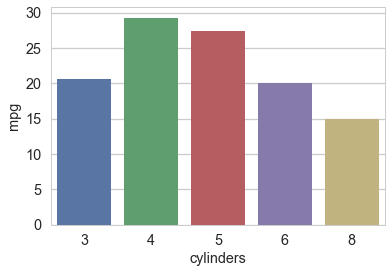

In [137]:
sn.barplot( y = 'mpg',x = 'cylinders',data = mpg_cylinders_df )

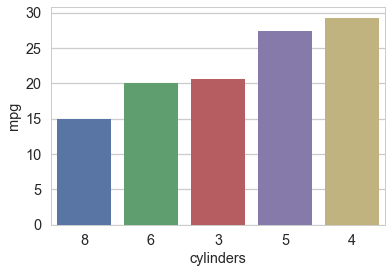

In [138]:
sn.barplot( y = 'mpg',x = 'cylinders',data = mpg_cylinders_df,
           order = mpg_cylinders_df.sort_values('mpg')['cylinders'])

# Average mpg by cyinders and grouped by origin

In [139]:
mpg_cylinders_origin_df = dataset.groupby(['cylinders', 'origin'])['mpg'].mean().reset_index()
mpg_cylinders_origin_df

,cylinders,origin,mpg
0,3,3,20.550000
1,4,1,28.013043
2,4,2,28.106557
3,4,3,31.595652
4,5,2,27.366667
5,6,1,19.645205
6,6,2,20.100000
7,6,3,23.883333
8,8,1,14.963107


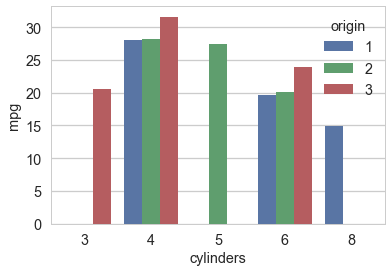

In [140]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_origin_df,
          hue = 'origin');

# Trend in average MPG by year for different origin cars

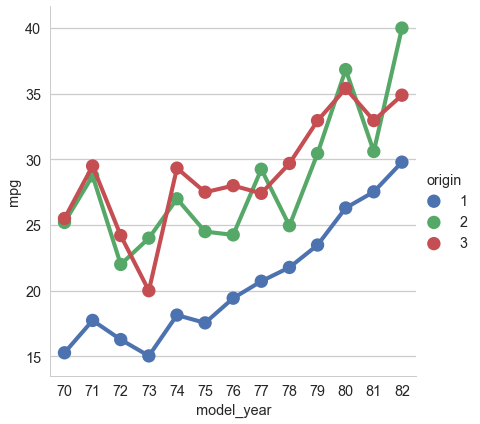

In [141]:
mpg_year_origin_df = dataset.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()
sn.factorplot( x = 'model_year', y = 'mpg', hue = 'origin', kind = 'point', data = mpg_year_origin_df,
              size = 6 )

# Creating a histogram - Distribution of mpg (miles per gallon)

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

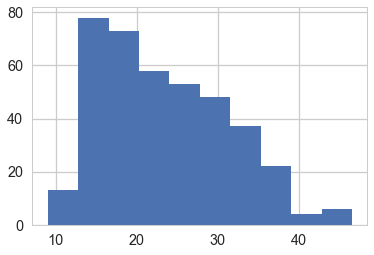

In [142]:
plt.hist(dataset.mpg )

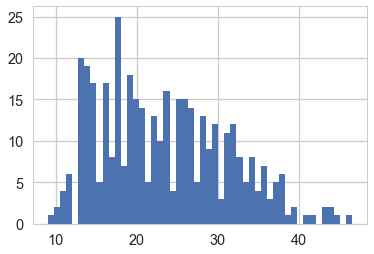

In [143]:
plt.hist( dataset.mpg, bins = 50 );

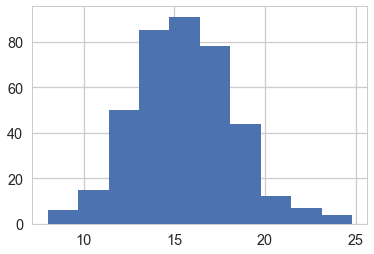

In [144]:
plt.hist( dataset.acceleration );

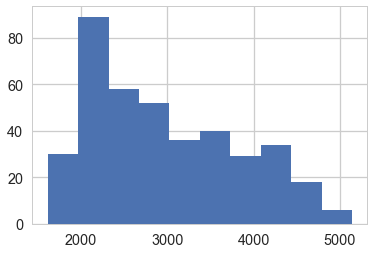

In [145]:
plt.hist( dataset.weight );

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


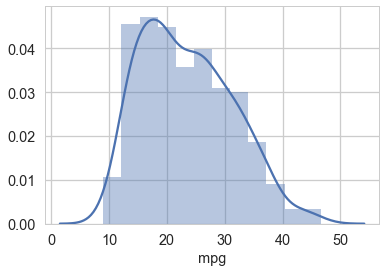

In [146]:
sn.distplot( dataset.mpg )

# Comparing mpg distributions of cars by different origin

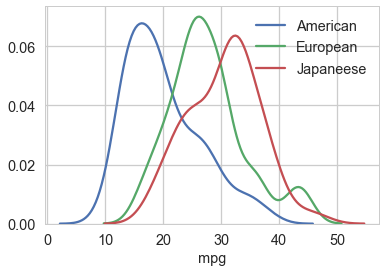

In [147]:
sn.distplot( dataset[dataset.origin == 1].mpg, hist = False, label= 'American' )
sn.distplot( dataset[dataset.origin == 2].mpg, hist = False, label= 'European' )
sn.distplot( dataset[dataset.origin == 3].mpg, hist = False, label= 'Japaneese' )

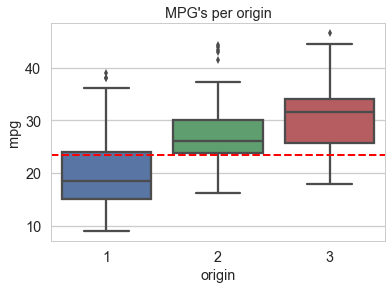

In [148]:
fig,ax = plt.subplots()
sn.boxplot(data=dataset[['origin','mpg']], x='origin',y='mpg',ax=ax)
ax.set(title="MPG's per origin")
plt.axhline(dataset.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

As we can see mpg is higher for foreign cars.

# MPG per model year

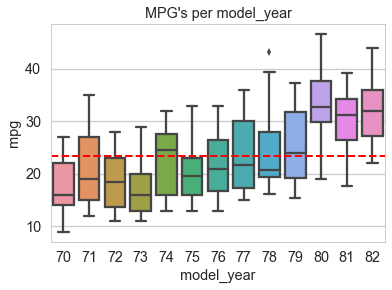

In [149]:
fig,ax = plt.subplots()
sn.boxplot(data=dataset[['model_year','mpg']], x='model_year',y='mpg',ax=ax)
ax.set(title="MPG's per model_year")
plt.axhline(dataset.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In general,mpg gets better over the years


# Calculating Statistics

In [150]:
mpg_desc = dataset.mpg.describe()
mpg_desc['mean']

23.445918367346938

# Setting image size and setting title in seaborn

In [151]:
sn.set(rc={"figure.figsize": (8, 6)});

# Distribution of mpg for all cars

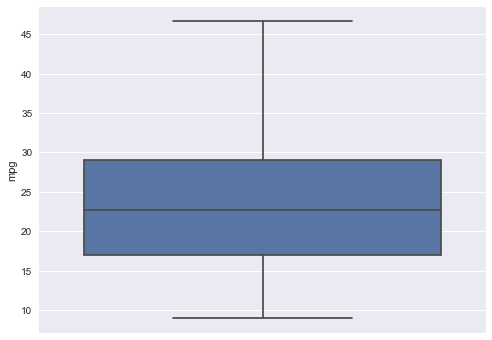

In [152]:
sn.boxplot( y = dataset.mpg )

# MPG distribution for different number of cylinders.

Text(0.5,1,'Box plots for various cylinder counts')

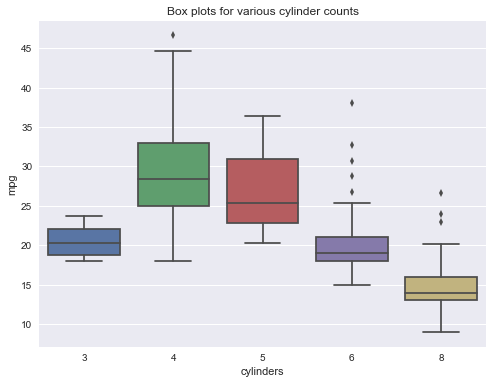

In [153]:
sn.boxplot( x = dataset.cylinders,
          y = dataset.mpg,order = dataset.cylinders.unique().sort() )
plt.title( "Box plots for various cylinder counts")

In general,we can see from the plot below mpg gets worse for higher cylinders and its the worst for eight cylinders

# Horsepower distribution for different number of cylinders.

Text(0.5,1,'Box plots for various cylinder counts')

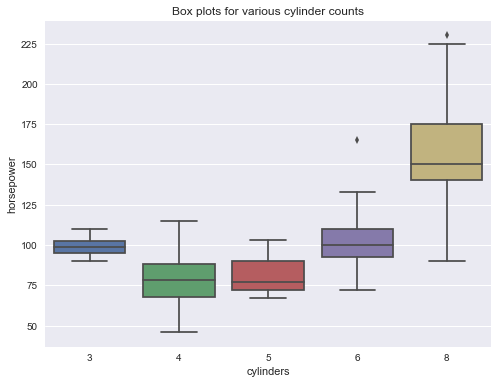

In [154]:
sn.boxplot( x = dataset.cylinders,
          y = dataset.horsepower,
          order = dataset.cylinders.unique().sort() )
plt.title( "Box plots for various cylinder counts")

As the number of cylinders increases to 4, mpg also increases and it starts to decrease after 4 cylinders.The more cylinders you add you get more power at the expense of mpg.

# MPG distribution by company

In [155]:
print(dataset.index)

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car_name', length=392)


Using regular expressions to quickly extract the company from the index. 
The index is in the format 'COMPANY - SPACE -MODEL - SPACE -VARIANT' .

In [156]:
dataset["Company"]=dataset.index

In [157]:
dataset['Company'] = dataset["Company"].str.extract('(^.*?)\s')
dataset['Company']

car_name
chevrolet chevelle malibu             chevrolet
buick skylark 320                         buick
plymouth satellite                     plymouth
amc rebel sst                               amc
ford torino                                ford
ford galaxie 500                           ford
chevrolet impala                      chevrolet
plymouth fury iii                      plymouth
pontiac catalina                        pontiac
amc ambassador dpl                          amc
dodge challenger se                       dodge
plymouth 'cuda 340                     plymouth
chevrolet monte carlo                 chevrolet
buick estate wagon (sw)                   buick
toyota corona mark ii                    toyota
plymouth duster                        plymouth
amc hornet                                  amc
ford maverick                              ford
datsun pl510                             datsun
volkswagen 1131 deluxe sedan         volkswagen
peugeot 504                    

In [159]:
dataset.loc[dataset['Company']=='volkswagen','Company']='VW'
dataset.loc[dataset['Company']=='vokswagen','Company']='VW'
dataset.loc[dataset['Company']=='vw','Company']='VW'
dataset.loc[dataset['Company'] =='maxda','Company']='mazda'
dataset.loc[dataset['Company'] == 'toyouta','Company']='toyota'
dataset.loc[dataset['Company'] =='mercedes','Company']='mercedes-benz'
dataset.loc[dataset['Company'] == 'nissan','Company']='datsun'
dataset.loc[dataset['Company'] =='capri','Company']='ford'
dataset.loc[dataset['Company'] =='chevroelt','Company']='chevrolet'
dataset.loc[dataset['Company'] =='chevy','Company']='chevrolet'
dataset['Company'].fillna(value ='subaru',inplace=True) 

In [160]:
print(dataset['Company'])

car_name
chevrolet chevelle malibu             chevrolet
buick skylark 320                         buick
plymouth satellite                     plymouth
amc rebel sst                               amc
ford torino                                ford
ford galaxie 500                           ford
chevrolet impala                      chevrolet
plymouth fury iii                      plymouth
pontiac catalina                        pontiac
amc ambassador dpl                          amc
dodge challenger se                       dodge
plymouth 'cuda 340                     plymouth
chevrolet monte carlo                 chevrolet
buick estate wagon (sw)                   buick
toyota corona mark ii                    toyota
plymouth duster                        plymouth
amc hornet                                  amc
ford maverick                              ford
datsun pl510                             datsun
volkswagen 1131 deluxe sedan                 VW
peugeot 504                    

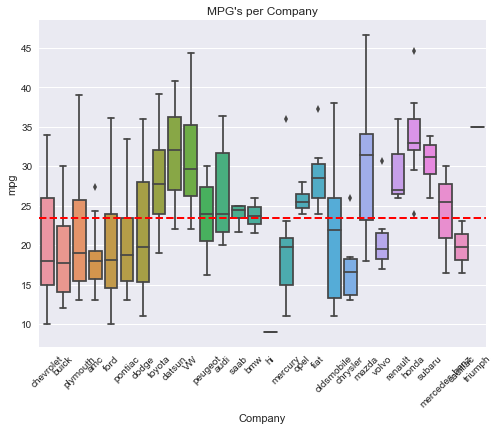

In [161]:
fig,ax = plt.subplots()
fig=sn.boxplot(data=dataset[['Company','mpg']],x='Company',y='mpg',ax=ax)
ax.set(title="MPG's per Company")
fig.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.axhline(dataset.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

As we can see from the above plot foreign companies produce cars with a better mpg especially asian cars.The collinarity between the different features might help us simplify our analysis. If we have a very strong correlation between any two features , we could drop one of them.

# Finding Outliers for 6 Cylinder Cars

In [162]:
dataset[dataset.cylinders == 6].mpg.quantile( 0.75 )

21.0

In [163]:
import scipy.stats as sts
sts.iqr(dataset[dataset.cylinders == 6].mpg )


3.0

Extreme outliers: 0.75 percetile + 3 * iqr

In [164]:
outlier = dataset[dataset.cylinders == 6].mpg.quantile(0.75) +3 * sts.iqr(dataset[dataset.cylinders == 6].mpg )
outlier

30.0

In [165]:
dataset[dataset.cylinders == 6][dataset[dataset.cylinders == 6].mpg > outlier ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model_year,Company
car_name,,,,,,,,,,
datsun 280-zx,32.7,6,168.0,132.0,2910,11.4,80,3,80,datsun
volvo diesel,30.7,6,145.0,76.0,3160,19.6,81,2,81,volvo
oldsmobile cutlass ciera (diesel),38.0,6,262.0,85.0,3015,17.0,82,1,82,oldsmobile


IQR (inter quartile range) spans between 17 to 29 mpg. 50% of the cars lies in this range.

# Creating scatter plots - weight vs. mpg

Text(0,0.5,'mpg')

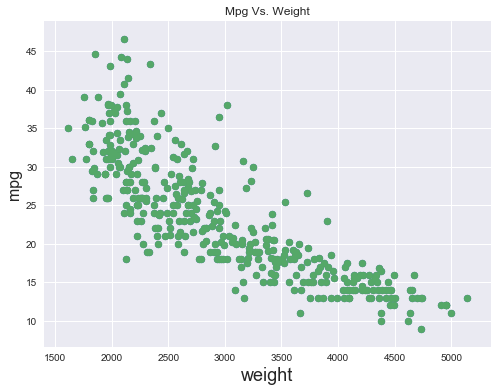

In [166]:
plt.scatter( dataset.weight,dataset.mpg );
#Setting titles, x label, y lable & saving image to file
plt.scatter( dataset.weight, dataset.mpg )
plt.title("Mpg Vs. Weight")
plt.xlabel('weight', fontsize=18)
plt.ylabel('mpg', fontsize=16)
#plt.savefig('test.jpg')

# Joint plots

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


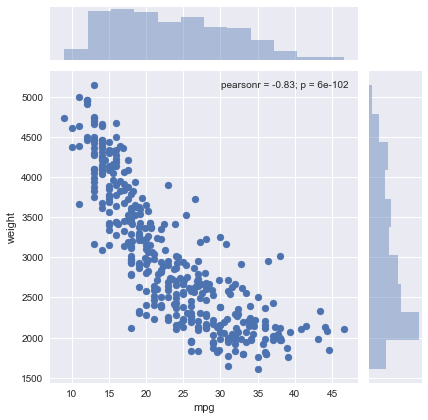

In [167]:
sn.jointplot( dataset.mpg, dataset.weight, size = 6 );

# Multivariate distribution plot

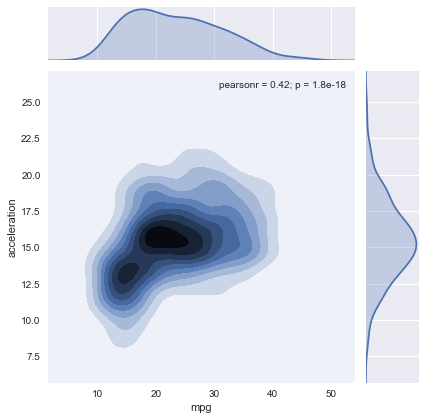

In [168]:
sn.jointplot(x="mpg", y="acceleration", data=dataset, kind="kde");

# Weight vs. mpg for different number of cylinders in cars

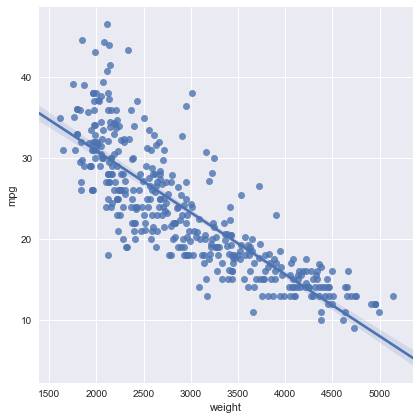

In [169]:
sn.lmplot(x="weight", y="mpg", data= dataset, fit_reg = True, size = 6 )

# Visualizing the correlation between more than 2 variables, pair-wise at same time.

<Figure size 432x432 with 0 Axes>

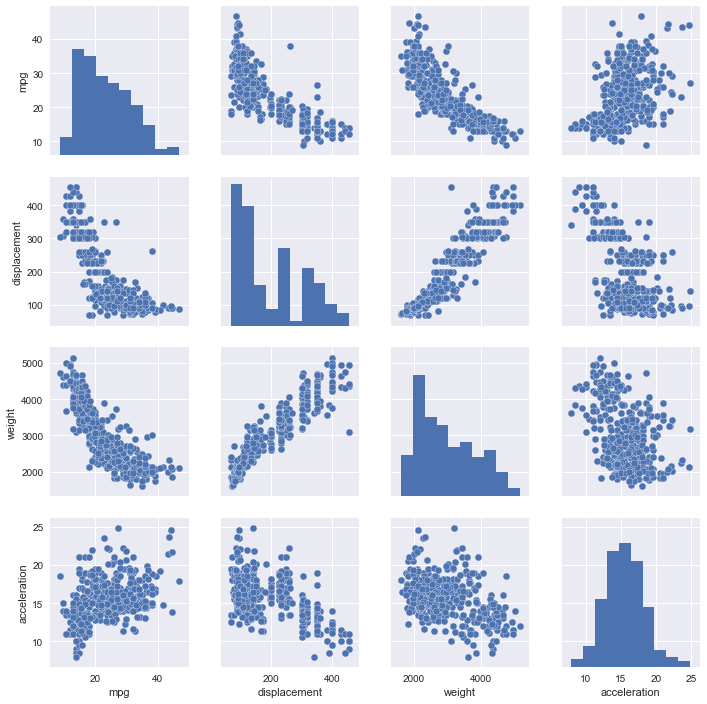

In [170]:
autos_stats = dataset[['mpg', 'displacement','weight', 'acceleration']]
plt.figure( figsize = (6,6));
sn.pairplot( autos_stats );

# Finding correlations

In [171]:
autos_stats.corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.805127,-0.832244,0.423329
displacement,-0.805127,1.000000,0.932994,-0.543800
weight,-0.832244,0.932994,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.416839,1.000000


# Creating a heatmap to depict correlations

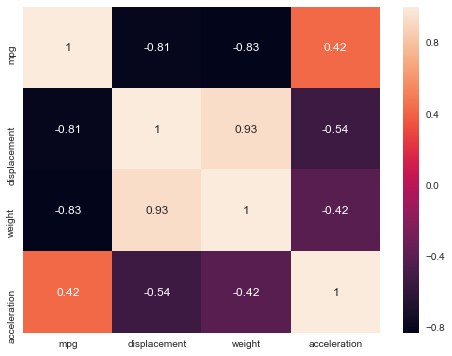

In [172]:
sn.heatmap( autos_stats.corr(), annot = True )

As we can see from the heat map acceleration has a weaker correlation with mpg than the other factors. horsepower has a strong correlation with acceleration and weight. Displacement has a strong correlation with weight and horsepower.

# Comparing distribution of variables together

In [173]:
autos_subset_df = dataset[['mpg', 'displacement', 'weight', 'acceleration', 'origin']]
auto_melt_df = pd.melt(autos_subset_df, "origin", var_name="measures")
auto_melt_df.sample(10)

,origin,measures,value
133,1,mpg,18.0
19,2,mpg,26.0
690,1,displacement,260.0
1425,1,acceleration,12.8
840,3,weight,2278.0
1489,1,acceleration,20.1
211,1,mpg,13.0
1307,1,acceleration,17.0
934,1,weight,3264.0
1098,1,weight,3381.0


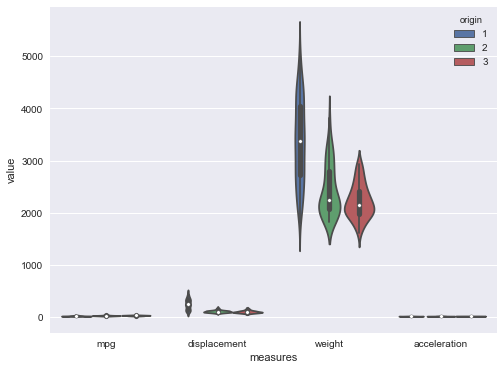

In [174]:
sn.violinplot(x="measures", y="value", hue="origin", data=auto_melt_df)

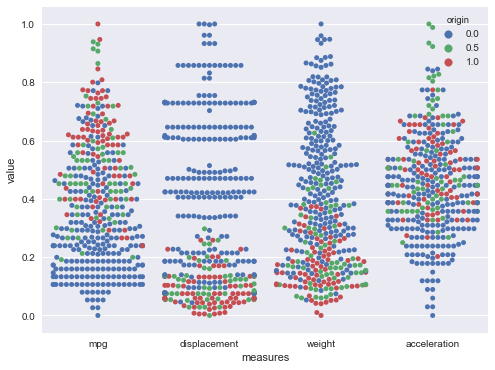

In [175]:
autos_subset_df = dataset[['mpg', 'displacement', 'weight', 'acceleration', 'origin']]
autos_subset_df = autos_subset_df.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
auto_melt_df = pd.melt(autos_subset_df, "origin", var_name="measures")
sn.swarmplot(x="measures", y="value", hue="origin", data=auto_melt_df);

# How American cars' mpg compared to foreign cars?

In [176]:
from scipy import stats
#Start with European cars
stats.ttest_ind( dataset[dataset.origin == 1]["mpg"],dataset[dataset.origin == 2 ]["mpg"],equal_var=True)

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [177]:
#Compare with Japenese cars
stats.ttest_ind( dataset[dataset.origin == 1]["mpg"],dataset[dataset.origin == 3]["mpg"],equal_var=True)


Ttest_indResult(statistic=-12.664889006229084, pvalue=4.17283714676552e-30)

As p-value is less than 0.05 in both cases. We can say that average mpg for american cars are different than average mpg for Foreign.

As we can see from the above plot foreign companies produce cars with a better mpg especially asian cars.

The collinarity between the different features might help us simplify our analysis. If we have a very strong correlation between any two features , we could drop one of them. 

# Conclusion

Efficiency measured by mpg improved over years for different cars of every origin i.e. whether its foreign made or US made. The measure of effieciency measured by mpg as compared to cylinders shows mpg decreases as the cylinders increase. When we compare cars of the same year by origin the US cars are less efficient or have less mpg than the foreign made cars. Last but not least, foreign model cars are more efficient as compared to US model cars. 